In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [2]:
X_train = pd.read_csv('hasil processing/x_train.csv', index_col = 0)
X_test = pd.read_csv('hasil processing/x_test.csv', index_col = 0)

y_train = pd.read_csv('hasil processing/y_train.csv', index_col = 0)
y_test = pd.read_csv('hasil processing/y_test.csv', index_col = 0)

In [3]:
X_train.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
994,0.441558,1,0.356522,0.297468,0.172414,0,0.737710,0.037037
250,0.792208,1,0.391304,0.265823,0.163793,1,0.030862,0.026936
1285,0.467532,0,0.869565,0.981013,0.775862,0,0.014226,0.239057
768,0.571429,1,0.347826,0.575949,0.189655,0,0.020099,0.010101
608,0.467532,1,0.391304,0.259494,0.094828,1,0.029692,0.016835


# Modeling

In [4]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

print(tf.config.list_physical_devices('GPU'))

['/device:CPU:0', '/device:GPU:0']
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
classifier = Sequential()

# Input Layer dan Hidden Layer Pertama
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

# Hidden Layer Kedua
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

# Hidden Layer Ketiga
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

# Hidden Layer Keempat
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Output Layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting Model
classifier.fit(X_train, y_train, batch_size = 64, epochs = 150, validation_split = 0.2 , verbose = 1)

Epoch 1/150
10/10 [==============================] - 7s 112ms/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6931 - val_accuracy: 0.5385
Epoch 2/150
10/10 [==============================] - 0s 22ms/step - loss: 0.6930 - accuracy: 0.5290 - val_loss: 0.6929 - val_accuracy: 0.5385
Epoch 3/150
10/10 [==============================] - 0s 28ms/step - loss: 0.6929 - accuracy: 0.5290 - val_loss: 0.6927 - val_accuracy: 0.5385
Epoch 4/150
10/10 [==============================] - 0s 20ms/step - loss: 0.6928 - accuracy: 0.5290 - val_loss: 0.6925 - val_accuracy: 0.5385
Epoch 5/150
10/10 [==============================] - 0s 17ms/step - loss: 0.6926 - accuracy: 0.5290 - val_loss: 0.6924 - val_accuracy: 0.5385
Epoch 6/150
10/10 [==============================] - 0s 19ms/step - loss: 0.6926 - accuracy: 0.5290 - val_loss: 0.6923 - val_accuracy: 0.5385
Epoch 7/150
10/10 [==============================] - 0s 19ms/step - loss: 0.6925 - accuracy: 0.5290 - val_loss: 0.6921 - val_accuracy: 0.5385
Epoch

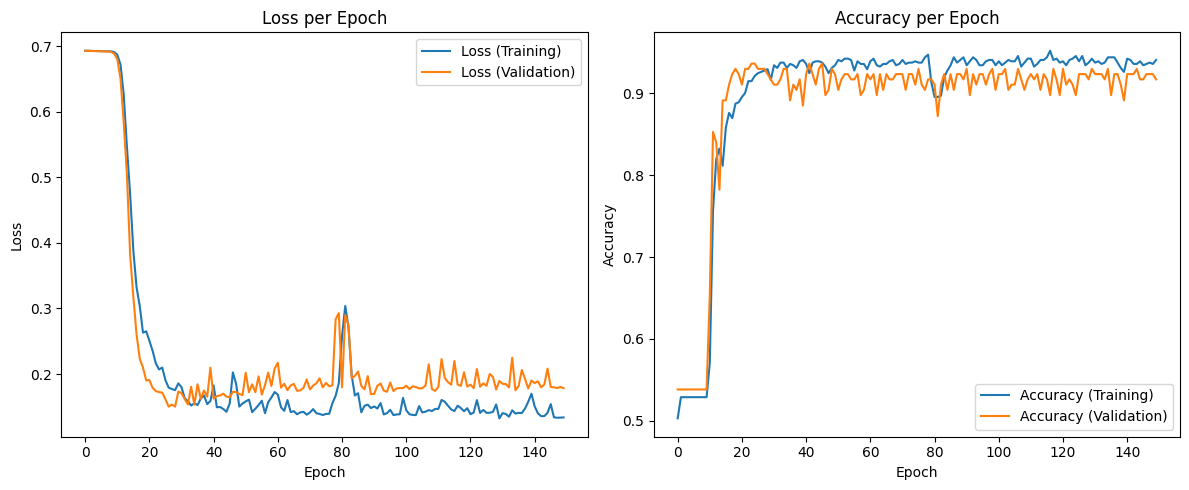

In [6]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(classifier.history.history['loss'], label='Loss (Training)')
plt.plot(classifier.history.history['val_loss'], label='Loss (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()

# Plot Akurasi
plt.subplot(1, 2, 2)
plt.plot(classifier.history.history['accuracy'], label='Accuracy (Training)')
plt.plot(classifier.history.history['val_accuracy'], label='Accuracy (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluasi

In [7]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

7/7 [==============================] - 0s 3ms/step


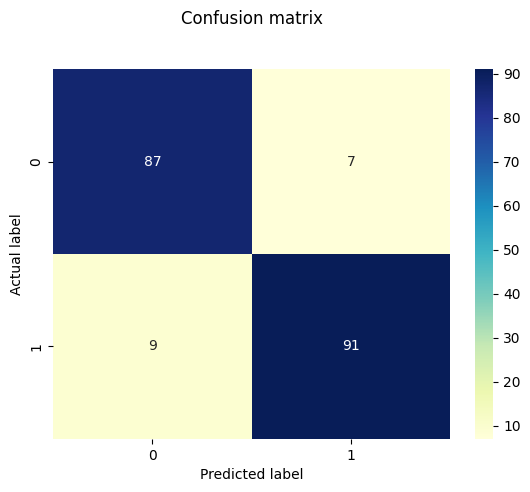

Accuracy: 91.7526
Precision: 91.7756
Recall: 91.7526
F1 Score: 91.7543


In [9]:
pl = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")